<a href="https://colab.research.google.com/github/Daffarr/UAS-KKPM/blob/main/UASKKPM_Daffa_Rayhan_Riadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Semua Library yang Diperlukan**

In [ ]:
import pandas as pd
import numpy as np

# Meng-ekstrak file zip
import zipfile, os

# pencarian dan pengelolaan file
import glob

# memproses dan menganalisis gambar
import cv2

# Melakukan Split Dataset
from sklearn.model_selection import train_test_split

# Melakukan pencarian parameter terbaik
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Menguji Model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Visualisasi Akurasi
import matplotlib.pyplot as plt

**Mengimport Dataset Melalui API Kaggle**

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d abbasitc/cotton-weed-classification-dataset

 84% 58.0M/69.2M [00:00<00:00, 104MB/s] 
100% 69.2M/69.2M [00:00<00:00, 105MB/s]


**Meng-Ekstrak file zip Dataset**

In [ ]:
zip_ref = zipfile.ZipFile('/content/cotton-weed-classification-dataset.zip', 'r')
zip_ref.extractall('/tmp/cotton-weed-classification-dataset')
zip_ref.close()

In [ ]:
os.listdir('/tmp/cotton-weed-classification-dataset/Segmtd_Cotton_Weed_Leaves_Dataset/Segmtd_Cotton_Weed_Leaves_Dataset')

['test', 'train']

**Mengakses dan Mengelola File Dataset, Kemudian Memasukkan File Ke Dalam Array Setelah di Proses**

In [ ]:
flat_data_arr = []
target_arr = []
path_1 = glob.glob('/tmp/cotton-weed-classification-dataset/Segmtd_Cotton_Weed_Leaves_Dataset/Segmtd_Cotton_Weed_Leaves_Dataset/train/cotton/*.jpg')
for image in path_1:
    n = cv2.imread(image)
    n = cv2.resize(n,(150,150))
    n = np.asarray(n)/255
    flat_data_arr.append(n.flatten())
    target_arr.append(0)


path_2 = glob.glob('/tmp/cotton-weed-classification-dataset/Segmtd_Cotton_Weed_Leaves_Dataset/Segmtd_Cotton_Weed_Leaves_Dataset/train/weed/*.jpg')
for image in path_2:
    n = cv2.imread(image)
    n = cv2.resize(n,(150,150))
    n = np.asarray(n)/255
    flat_data_arr.append(n.flatten())
    target_arr.append(1)


path_1 = glob.glob('/tmp/cotton-weed-classification-dataset/Segmtd_Cotton_Weed_Leaves_Dataset/Segmtd_Cotton_Weed_Leaves_Dataset/test/cotton/*.jpg')
for image in path_1:
    n = cv2.imread(image)
    n = cv2.resize(n,(150,150))
    n = np.asarray(n)/255
    flat_data_arr.append(n.flatten())
    target_arr.append(0)


path_2 = glob.glob('/tmp/cotton-weed-classification-dataset/Segmtd_Cotton_Weed_Leaves_Dataset/Segmtd_Cotton_Weed_Leaves_Dataset/test/weed/*.jpg')
for image in path_2:
    n = cv2.imread(image)
    n = cv2.resize(n,(150,150))
    n = np.asarray(n)/255
    flat_data_arr.append(n.flatten())
    target_arr.append(1)

**Melakukan Split Pada Dataset**

In [ ]:
X = np.array(flat_data_arr)
Y = np.array(target_arr)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,shuffle=True,stratify=Y)

**Melakukan Tuning Parameter**

In [ ]:
# Menggunakan Model Algoritma Support Vector Machine 
svc_model = SVC()
parameters = {
    'kernel': ['rbf','poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.1, 1]
}

svc_model_search = GridSearchCV(svc_model, parameters, cv=5)

# melatih model dengan fungsi fit
svc_model_search.fit(x_train, y_train)

# menampilkan parameter terbaik dari objek grid_search
print(svc_model_search.best_params_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
# Menggunakan Model Algoritma Random Forest Classifier (RFC)
rfc_model = RandomForestClassifier()
parameters =  {
    'n_estimators': range(10, 51, 10),
    'max_depth': range(5, 26, 5),
}

rfc_model_search = GridSearchCV(rfc_model, parameters, cv=5)

# melatih model dengan fungsi fit
rfc_model_search.fit(x_train, y_train)

# menampilkan parameter terbaik dari objek grid_search
print(rfc_model_search.best_params_)

{'max_depth': 5, 'n_estimators': 30}


In [ ]:
# Menggunakan Algoritma K-Neighbors Classifier (KNC)
knn_model = KNeighborsClassifier()
parameters =  {
    'n_neighbors': range(1, 51, 2),
}

knn_model_search = GridSearchCV(knn_model, parameters, cv=5)

# melatih model dengan fungsi fit
knn_model_search.fit(x_train, y_train)

# menampilkan parameter terbaik dari objek grid_search
knn_model_best_params = knn_model_search.best_params_
print(knn_model_best_params)

{'n_neighbors': 13}


Menguji atau Menghitung **Akurasi, confusion_matrix dan classificatin_report** Pada Masing-Masing Model

In [ ]:
model_svm = SVC(C=1, kernel='rbf', gamma=0.0001)

print(model_svm.fit(x_train,y_train))

accuracy_svm = model_svm.score(x_test,y_test)
print("Akurasi Model SVC = {}\n".format(accuracy_svm))

y_pred = model_svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred)
print("==> Hasil confusion_matrix\n")
print('{}\n'.format(cm_svm))

cr_svm = classification_report(y_test, y_pred)
print("==> Hasil classification_report\n")
print(cr_svm)

SVC(C=1, gamma=0.0001)
Akurasi Model SVC = 0.7878787878787878

==> Hasil confusion_matrix

[[19  1]
 [ 6  7]]

==> Hasil classification_report

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.88      0.54      0.67        13

    accuracy                           0.79        33
   macro avg       0.82      0.74      0.76        33
weighted avg       0.81      0.79      0.77        33



In [ ]:
model_rfc = RandomForestClassifier(max_depth= 5, n_estimators= 30)

print(model_rfc.fit(x_train,y_train))

accuracy_rfc = model_rfc.score(x_test,y_test)
print("Akurasi Model SVC = {}\n".format(accuracy_rfc))

y_pred = model_rfc.predict(x_test)
cm_rfc = confusion_matrix(y_test, y_pred)
print("==> Hasil confusion_matrix\n")
print('{}\n'.format(cm_rfc))

cr_rfc = classification_report(y_test, y_pred)
print("==> Hasil classification_report\n")
print(cr_rfc)

RandomForestClassifier(max_depth=5, n_estimators=30)
Akurasi Model SVC = 0.7272727272727273

==> Hasil confusion_matrix

[[19  1]
 [ 8  5]]

==> Hasil classification_report

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        20
           1       0.83      0.38      0.53        13

    accuracy                           0.73        33
   macro avg       0.77      0.67      0.67        33
weighted avg       0.75      0.73      0.70        33



In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=13)

print(model_knn.fit(x_train,y_train))

accuracy_knn = model_knn.score(x_test,y_test)
print("Akurasi Model SVC = {}\n".format(accuracy_knn))

y_pred = model_knn.predict(x_test)
cm_knn = confusion_matrix(y_test, y_pred)
print("==> Hasil confusion_matrix\n")
print('{}\n'.format(cm_knn))

cr_knn = classification_report(y_test, y_pred)
print("==> Hasil classification_report\n")
print(cr_knn)

KNeighborsClassifier(n_neighbors=13)
Akurasi Model SVC = 0.6666666666666666

==> Hasil confusion_matrix

[[15  5]
 [ 6  7]]

==> Hasil classification_report

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.58      0.54      0.56        13

    accuracy                           0.67        33
   macro avg       0.65      0.64      0.65        33
weighted avg       0.66      0.67      0.66        33



In [ ]:
models = pd.DataFrame({
    'Model': ['SVM','RandomForestClassifier', 'KNeighborsClassifier'],

    'Score': [accuracy_svm*100,
              accuracy_rfc*100,
              accuracy_knn*100]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,SVM,78.787879
1,RandomForestClassifier,72.727273
2,KNeighborsClassifier,66.666667


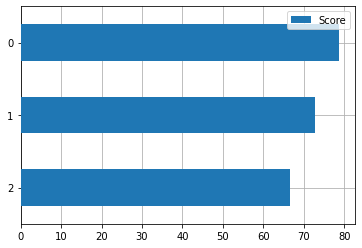

In [ ]:
# Visualisasi dari prediksi yang telah dilakukan
fig, ax = plt.subplots()
models.sort_values(by='Score', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)